In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [48]:
df = pd.read_csv('Fakenews.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [49]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [50]:
df.fillna(" ", inplace= True)

In [51]:
df.shape

(20800, 5)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [53]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [54]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [55]:
port_stem = PorterStemmer()

In [56]:
df['content'] = df['title'] + " " + df['author']

In [57]:
def stemming(content):
    stemmed_content= re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower() 
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content

In [58]:
df['content']= df['content'].apply(stemming)

In [59]:
df['content']

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get fire consortiumnew com
3        civilian kill singl us airstrik identifi jessi...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci jero...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkan alex ...
20799                            keep f aliv david swanson
Name: content, Length: 20800, dtype: object

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [61]:
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(df['content'].values)
tfidf = transformer.fit_transform(counts)

In [62]:
targets = df['label'].values

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, targets, test_size=0.30, random_state=101)

In [64]:
X_train.shape,X_test.shape, y_train.shape

((14560, 131551), (6240, 131551), (14560,))

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score

Logistic Regression Model

In [83]:
lr =  LogisticRegression()

In [84]:
lr.fit(X_train,y_train)

LogisticRegression()

In [85]:
y_pred = lr.predict(X_test)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3103
           1       0.95      1.00      0.97      3137

    accuracy                           0.97      6240
   macro avg       0.97      0.97      0.97      6240
weighted avg       0.97      0.97      0.97      6240



In [87]:
print(accuracy_score(y_test,y_pred))

0.9693910256410256


In [88]:
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

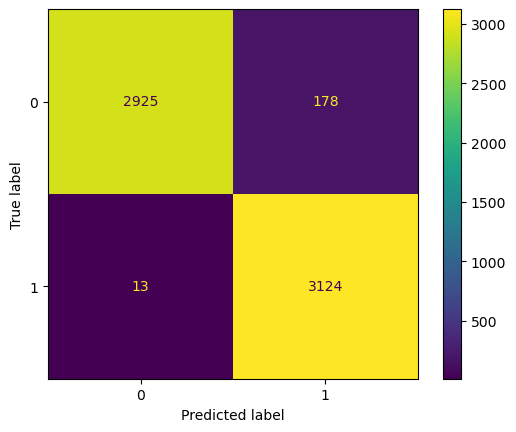

In [89]:
conf_matrix(lr)

Decision Tree Classifier

In [90]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=9)

In [91]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [92]:
y_pred=dtree.predict(X_test)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3103
           1       0.92      1.00      0.96      3137

    accuracy                           0.96      6240
   macro avg       0.96      0.96      0.96      6240
weighted avg       0.96      0.96      0.96      6240



In [94]:
print(accuracy_score(y_test,y_pred))

0.9556089743589744


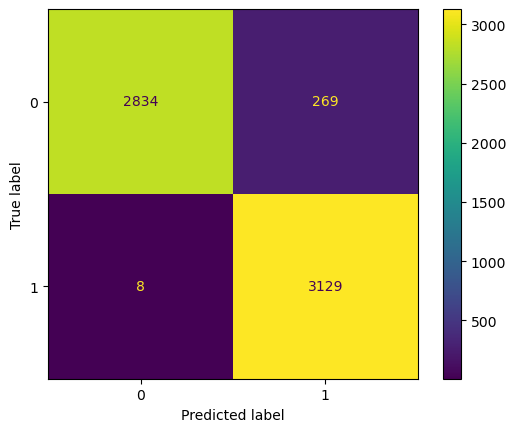

In [95]:
conf_matrix(dtree)

SVM

In [96]:
svc_model=SVC()

In [97]:
svc_model.fit(X_train,y_train)

SVC()

In [98]:
y_pred=svc_model.predict(X_test)

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3103
           1       0.98      1.00      0.99      3137

    accuracy                           0.99      6240
   macro avg       0.99      0.99      0.99      6240
weighted avg       0.99      0.99      0.99      6240



In [100]:
print(accuracy_score(y_test,y_pred))

0.9855769230769231


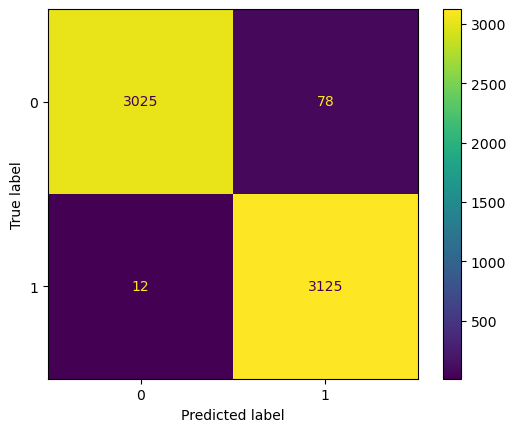

In [101]:
conf_matrix(svc_model)

#Random Forest Classifier

In [102]:
rfc = RandomForestClassifier()

In [103]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [104]:
y_pred = rfc.predict(X_test)

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3103
           1       0.99      1.00      1.00      3137

    accuracy                           1.00      6240
   macro avg       1.00      1.00      1.00      6240
weighted avg       1.00      1.00      1.00      6240



In [106]:
print(accuracy_score(y_test,y_pred))

0.9951923076923077


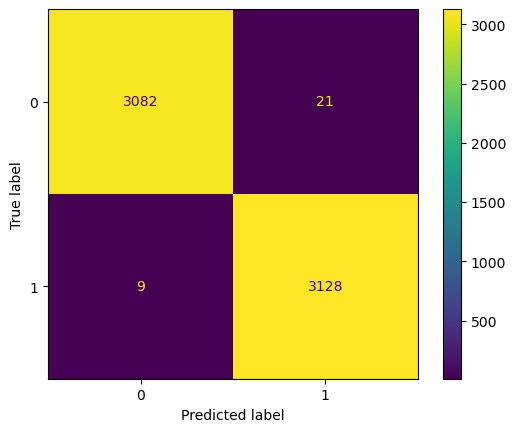

In [107]:
conf_matrix(rfc)

In [108]:
models = pd.DataFrame({
    "Models":["Logistic Regression", "SVM", "DecisionTreeClassifier", "RandomForestClassifier"],
    "Score" :[lr.score(X_test,y_test) ,svc_model.score(X_test,y_test) ,dtree.score(X_test,y_test), rfc.score(X_test,y_test) ]
})
models.sort_values(by='Score', ascending=False)

,Models,Score
3,RandomForestClassifier,0.995192
1,SVM,0.985577
0,Logistic Regression,0.969391
2,DecisionTreeClassifier,0.955609


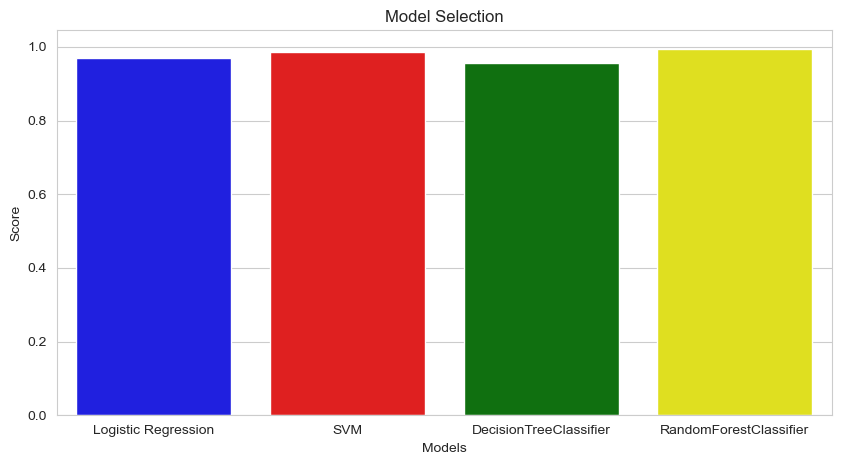

In [109]:
colors= ['blue','red','green','yellow']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x=models['Models'],y=models['Score'], palette=colors )
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Selection")
plt.show()

So, Random Forest is best in this particular Fake_news classifier
Thanks